
# Project 2: Investigate TMDB movie data



<a id='intro'></a>
## Introduction

> In this project, we are going to investigate the TMDB movie data.Looking roughly thorugh the data , we could see that the data contains informations like name of the movie, runtime, cast, genre,overview,budget,revenue etc.

>Now let's try to frame some questions which could be answered by exploring the data.

> 1. What are the top 10 grossed movies of all time with high profit ?

> 2. Does the number of votes affect the vote average of a movie?

> 3. Which director has given max. no of movies?

> 4. Who is the most successful director?

> 5. Is there any relation between popularity and vote count?

> 6. During which year, max. no of movies got released?

> 7. Is there any relation between profit and vote average?

> 8. what is the average run time of movies?


 As a first step, let's import all necessary packages that are used for exploring the data.

In [1]:
#importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



### General Properties

 Lets load the data from the CSV file and have a look at the rows and columns 

In [2]:
#loading the data

df=pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Data Wrangling and Data Cleaning

 Lets see how many rows and columns are present in our dataset

In [3]:
#finding the no. of rows and columns

df.shape

(10866, 21)

 Next, lets look at the no. of values in each column and datatype of each column

In [4]:
# looking at datatype of each column and no. of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

 If you see the above details, some columns seems to have missing values like tagline, keyewords etc.
Also there are many columns in this dataset and we won't be using all the columns to investigate the data. 
Therfore we can drop all the columns which we feel is not of great use for our investigation.

In [5]:
#dropping the unnecessary rows

df.drop(['tagline','keywords','id','imdb_id','homepage','overview'],axis=1,inplace=True)

In [6]:
#details about the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


 If you look at the above details few columns still seems to have some missing values.
In my analysis, i am not gonna use cast and production companies, so gonna  drop those too.

In [7]:
#dropping columns

df.drop(['cast','production_companies'],axis=1,inplace=True)

In [8]:
#column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


 Even after that, there seems to be some missing values, hence lets fix those

In [9]:
#Filling null values

df['director'].fillna('no value',inplace=True)

In [10]:
#column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


In [11]:
#Looking at columns where genre value is null

df[df.genres.isnull()]

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,0.244648,0,0,Belli di papÃ,Guido Chiesa,100,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/6/15,13,5.0,2015,0.00000,0.0
997,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Steward Lee|Steven G. Lee,44,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,2/27/09,57,7.4,2009,0.00000,0.0
1897,0.020701,0,0,Jonas Brothers: The Concert Experience,Bruce Hendricks,76,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,0.081892,0,0,Freshman Father,Michael Scott,0,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,0.068411,0,0,Doctor Who: A Christmas Carol,no value,62,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan,110,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Kim Jin-Yeong,96,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,7/27/12,12,8.3,2012,0.00000,0.0


 If you have a look at the above data, it doesn't seem to make much sense as values in budget and revenue columns  are zero 
Hence we can drop these rows

In [12]:
#drop the rows which contain null values

df.dropna(subset=['genres'],axis=0 , inplace=True)

In [13]:
#column details

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
director          10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
budget_adj        10843 non-null float64
revenue_adj       10843 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


 Now the no.of values in all rows are same i.e. there is no missing values.Lets look for any duplicate values and drop them  too

In [14]:
#caculating the number of duplicate rows

sum(df.duplicated())

1

In [15]:
#dropping the duplicate rows

df.drop_duplicates(inplace=True)

In [16]:
#column details

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
director          10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


 The data type of release data seems to be object(string). I would like to convert it to datetime and i would like the datatypes of bydget_adj and revenue_adj too.


In [17]:
#converting the datatype of release_date to datetime and converting budget & revenue to integer types

df['release_date']=pd.to_datetime(df['release_date'])
df['budget_adj']=df['budget_adj'].astype(int)
df['revenue_adj']=df['revenue_adj'].astype(int)

In [18]:
#column details

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10842 non-null float64
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
director          10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null int64
revenue_adj       10842 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Now we shall try to address all the questions that were stated earlier



###  1. What are the top 10 grossed movies of all time with high profit?

In [19]:
#statistical details about budget and revenue columns

df[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.084200e+04,1.084200e+04
mean,1.758712e+07,5.147797e+07
std,3.433437e+07,1.447723e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.092507e+07,3.387838e+07
max,4.250000e+08,2.827124e+09


If you look at the above details, there are rows having both budget_adj and revenue_adj having values equal to zero
which makes no sense. So let's look at the no. of rows having values equal to zero

In [20]:
#finding the no.of rows where budget value is Zero

df[df['budget_adj'] == 0].shape

(5676, 13)

It looks like about 5676 rows has budget values to be zero. hence its not fair on dropping all the rows having zero
values as the count is high.Hence we need to neglect the zero rows and explore the other rows

The question here is to find the top 10 movies of highest profit.There is no column called profit hence we need to calculate it using the available data.

Here we have two columns which provide budget and revenue for each film.Therfore we can calculate profit using the below formula:

PROFIT = revenue - budget

In [21]:
#Computing Profit value

df['profit'] = df['revenue_adj'] - df['budget_adj']

In [22]:
#Considering rows where both budget and revenue values are greater than zero.

high_prof=df[ (df['revenue_adj'] > 0) & (df['budget_adj']> 0) ]

Since rows having revenue and budget values as zero doesnt make sense, 
we are neglecting those rows here in our analysis

In [23]:
#Looking through some rows in the dataframe

high_prof.head(3)

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137999939,1392445892,1254445953
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137999939,348161292,210161353
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101199955,271619025,170419070



We shall sort the columns based on proft value so that we get top 10 grossed films.

In [24]:
#sorting all rows based on profit value

res=high_prof.sort_values('profit',ascending=False)

In [25]:
#selecting the first 10 rows

top_10=res[:10]

In [26]:
#Displaying original title and profit columns

top_10[['original_title','profit']]

,original_title,profit
1329,Star Wars,2750136651
1386,Avatar,2586236848
5231,Titanic,2234713671
10594,The Exorcist,2128035625
9806,Jaws,1878643093
8889,E.T. the Extra-Terrestrial,1767968064
3,Star Wars: The Force Awakens,1718723210
8094,The Net,1551568265
10110,One Hundred and One Dalmatians,1545635295
7309,The Empire Strikes Back,1376997526


If you look at the above details, <b>Star Wars</b> seems to be the movie with highest profit followed by <b>Avatar </b> and <b>Titanic</b>

Let's plot a bar graph for the top 10 movies

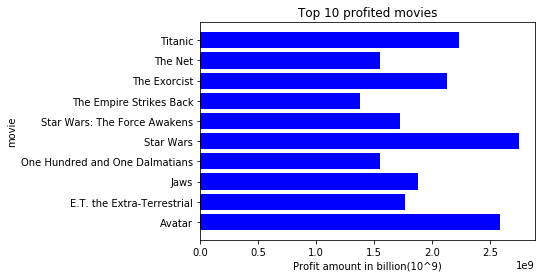

In [27]:
#Plotting a bar graph for the data

plt.barh(top_10['original_title'],top_10['profit'],color='blue');
plt.title('Top 10 profited movies');
plt.xlabel('Profit amount in billion(10^9)');
plt.ylabel('movie');

### 2. Does the number of votes affect the vote average of a movie?


Lets try to find if there is any relation between the vote count and average vote for each movie

In [28]:
#Statistical description of vote count and vote average columns.

df[['vote_count','vote_average']].describe()

,vote_count,vote_average
count,10842.000000,10842.000000
mean,217.823649,5.974064
std,576.180993,0.934257
min,10.000000,1.500000
25%,17.000000,5.400000
50%,38.000000,6.000000
75%,146.000000,6.600000
max,9767.000000,9.200000


It's a better idea to use scatter plot to find if there is any relationship  between the two variables

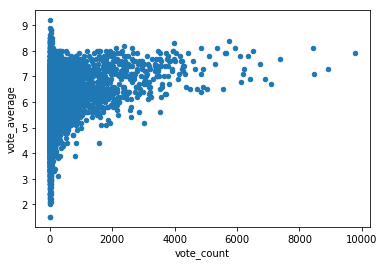

In [29]:
#Plotting a scatter plot to find out the relationship between the variables

df.plot(kind='scatter',x='vote_count',y='vote_average');

Looking at the above scatter plot, it doesn't feels like there is any sort of relationship between the two variables.

Still, let's try to find the correlation coefficient between vote count and vote average

In [30]:
#Computing the correlation coefficient.

df['vote_count'].corr(df['vote_average'])

0.25469783438846505

The value is 0.25, which suggests that there is  no real relationship between the vote count and vote average

 ### 3. Which director has given max. no of movies?


In all these years, lets try to find out which director had given the most number of movies.

In [31]:
#Grouping all the rows based on director and finding the count of movies by each director, then sorting those values

top_dir=df.groupby('director').count()['vote_count'].sort_values(ascending=False)


In [32]:
#First 10 rows

top_dir[:10]

director
Woody Allen          45
no value             42
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Name: vote_count, dtype: int64

Note :  we are neglecting 'no value' here since we added it manually to manage missing data

In [33]:
#Neglecting "No value" as it was added manually to manage missing data

top_dir=top_dir[top_dir.index != "no value"]

In [34]:
#First 10 rows

top_dir[:10]

director
Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: vote_count, dtype: int64

Looking at the above data, <b>Woody Allen</b> seems to have directed the most number of movies.

Let's plot a bar graph for top 10 director with most no.of movies.

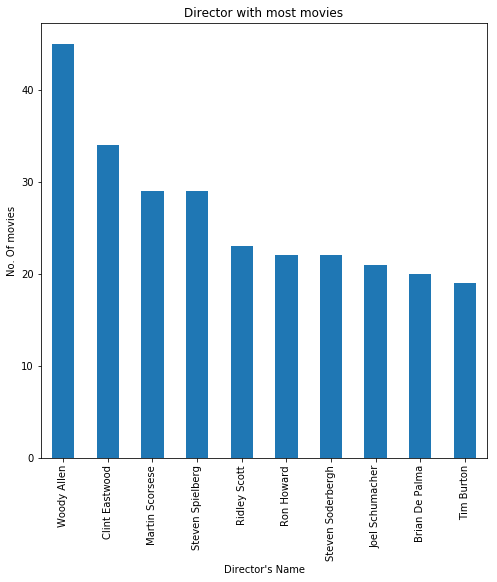

In [35]:
#Plotting a bar chart

top_dir[:10].plot(kind='bar',figsize=(8,8))
plt.title('Director with most movies');
plt.xlabel("Director's Name");
plt.ylabel('No. Of movies');


  ### 4. Who is the most successful director?


There are many ways to calcualte a movie success.Some may look at the movie revenue and some may look at the movie's rating.


To find the most succesful director, i am considering the average votes for all movies by a certain director

In [36]:
#Grouping all the rows by director and calculating the average vote for each movies

success = df.groupby('director').mean()['vote_average'].sort_values(ascending=False)

In [37]:
#First 10 rows

success[:10]

director
Mark Cousins                                   9.20
Derek Frankowski                               8.80
David Mallet                                   8.70
Martin Scorsese|Michael Henry Wilson           8.50
Saul Swimmer                                   8.50
Curt Morgan                                    8.50
D.A. Pennebaker|David Dawkins|Chris Hegedus    8.40
Jorge RamÃ­rez SuÃ¡rez                         8.40
Anthony Mandler                                8.40
Sam Dunn|Scot McFadyen                         8.35
Name: vote_average, dtype: float64

 <b>Mark Cousins</b> seems to be having the highest average rating for their movies.

 ### 5. Is there any relation between popularity and vote count?


There might be possibility that a movie receives more vote count because its a  popular one.

let's try to analyse the relationship between these two variables using a scatter plot



In [38]:
#statistical description of popularity and vote count columns

df[['popularity','vote_count']].describe()

,popularity,vote_count
count,10842.000000,10842.000000
mean,0.647461,217.823649
std,1.001032,576.180993
min,0.000065,10.000000
25%,0.208210,17.000000
50%,0.384532,38.000000
75%,0.715393,146.000000
max,32.985763,9767.000000


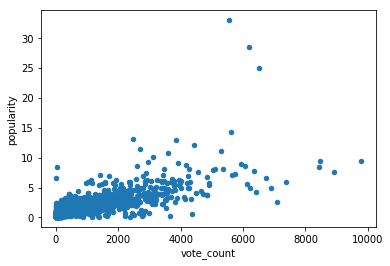

In [39]:
#Scatter plot to find any relationships

df.plot(kind='scatter',y='popularity',x='vote_count');

If you look at the initial portion of the scatter plot, it looks like vote count increases as the popularity increases.

let's calculate the correlation coefficient between these two

In [40]:
#Computing the correlation coefficient

df['vote_count'].corr(df['popularity'])

0.80078608712490462

The correlation coeff. value is <b>0.85</b> (closer to 1) suggests that there is a <b>positive correlation </b> between these two variables

 ### 6. Which year max. no of movies released?

There are many number of movies which are getting released every year.
Lets try to find out in which year maximum number of movies got released

In [41]:
#Grouping all the rows by release year

year = df.groupby('release_year').count()

In [42]:
#Sorting the values

year = year.sort_values('profit',ascending=False)

In [43]:
#First 10 rows

year[:10].profit

release_year
2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
Name: profit, dtype: int64

Year <b>2014</b> seems to be topping the list with <b>699</b> movies released in that year

lets plot a graph for the top 10 years

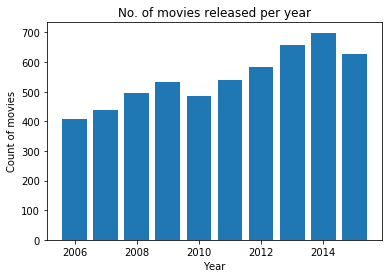

In [44]:
#Plotting the bar graph

plt.bar(year[:10].index,year[:10].popularity);
plt.title('No. of movies released per year');
plt.xlabel('Year');
plt.ylabel('Count of movies');

 ### 7. Is there any relation between profit and vote average?


Lets try to find is there any relationship between profit and averag rating for a movie.

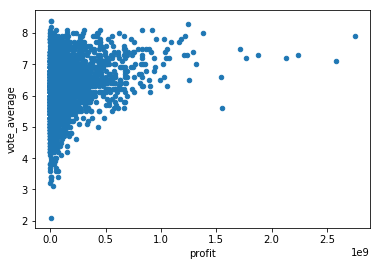

In [45]:
#Scatter plot to find out of there is any relationship between columns

df[df['profit']>0].plot(kind='scatter',x='profit',y='vote_average')

Its tough to say that these two variables have any relationship between them 
with reference to above scatter plot. 

We shall calculate the correlation coeff.

In [46]:
#Finding the correlation coefficient

df['profit'].corr(df['vote_average'])

0.19818616425888536

The value is  <b> 0.19 </b> (approx. 0) suggests that there is no relationship between movie rating and profit

 ### 8. what is the average run time of movies?


Generally holloywood movies tends to have a runtime of below 2hours.Lets try to examine the average run time for all movies

In [47]:
#Computing the mean value of runtime

df['runtime'].mean()

102.1384430916805

The mean runtime of movies is around 102 minutes(less than 2 hrs)

Lets visualize the movie's runtime via histogram

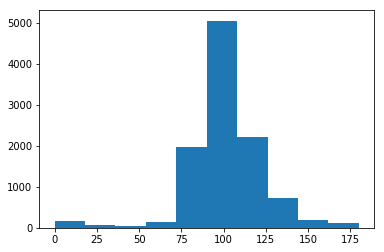

In [48]:
#Histogram plot to view the spread of runtime

plt.hist(df['runtime'],range=[0,180]);

Looking at the histogram , we can clearly say that most movies have runtime around <b>95 - 120 minutes</b>

 ## Limitations

> 1. Both revenue and budget columns had values equal to zero which doesn't makes any sense.
    You can't drop all the rows with zero values as almost half the rows in the dataset has zero values.
    
> 2. There are null values in director column,you can't just blindly drop these rows as well as it affects other computataions.
     Also you can't fill the missing values here in this column.
     
> 3. For explorations involving the director colummn, there are few rows which contained multiple director names sepearated by       a '|'. As there are only few rows, i didn't split those values and procced accordingly     

<a id='conclusions'></a>
## Conclusions

> 1.<b>Star Wars</b> seems to be movie with higest profit.

> 2.There is <b>no relationship</b> between vote counts and average vote for a movie.

> 3.<b>Woody Allen</b> had directed the maximum number of movies.

> 4.<b>Mark Cousins</b> seems to be having the highest average rating for their movies.

> 5.There is a <b>positive correlation </b> between popularity and vote count. ie. as the popularity increases the vote count also increases.

> 6.Around  <b>699 </b> movies were released in the year 2014 which is the highest in a single year.

> 7.There is <b>no relationship</b> between a movie's rating and a movie's profit.

> 8.The average runtime of all movies seems to be around <b>102 minutes</b>

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0